# Exercício

# Classificação - Dados tabulares

**Exercício: Classificação se um paciente possui diabetes**

**Arquivo diabetes.csv**

**Passos:**

1. Carregue o conjunto de dados em um DataFrame usando a biblioteca pandas.
2. Explore e visualize os dados para entender suas características.
3. Divida os dados em recursos (X) e rótulos (y).
4. Divida o conjunto de dados em conjuntos de treinamento e teste.
5. Utilização de Ensemble scikit-learn `RandomForestlassifier`:
   1. Inicialize o modelo.
   2. Treine o modelo usando o conjunto de treinamento.
   3. Faça previsões usando o conjunto de teste.
   4. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
6. Utilização de Ensemble scikit-learn `XGBClassifier`:
   1. Inicialize o modelo.
   2. Treine o modelo usando o conjunto de treinamento.
   3. Faça previsões usando o conjunto de teste.
   4. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc. 

# Classificação - Imagem

**Classificação de tipos de tumores**

**Imagens na pasta Datasets/Exercicio_Tumores**

**Passos:**

1. Carregue o conjunto de imagens.
2. Realize o pre processamento.
3. Divida os dados em recursos (X) e rótulos (y).
4. Divida o conjunto de dados em conjuntos de treinamento, validação e teste.
5. Treinamento: 
   1. Definição de arquitetura:
      1. Definir quantas camadas são necessárias para o problema
      2. A quantidade de neurônios em cada camada.
      3. A função de ativação de cada camada.
      4. Regularização - dropout.
      5. A função de ativação da saída.
         * softmax (saída não binária).
         * sigmoid (saída binária).
   2. `.compile`: Definição dos otimizadores.
   3. Regularização - earlystop.
   4. `.fit`: Adicionar conjuntos de treinamento e validação; e determinar a quantidade de épocas.
6. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc. 

# Prática - Tumor

In [1]:
import pathlib
import cv2
import os
import matplotlib.pyplot as plt

#### 1. Aquisição dos dados


In [2]:
path = '../../Datasets/Exercicio_Tumores'
data = pathlib.Path(path)

In [3]:
data

WindowsPath('../../Datasets/Exercicio_Tumores')

In [4]:
list(data.glob('*/*.jpg'))[:2]

[WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_1.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_10.jpg')]

In [5]:
list(data.glob('glioma_tumor/*.jpg'))[:5]

[WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_1.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_10.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_100.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_101.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_102.jpg')]

In [6]:
# Cria um dicionário chamado 'disease' para armazenar os caminhos dos arquivos de imagem para diferentes condições cerebrais
disease = {
    # Para 'glioma_tumor', encontra todos os arquivos .jpg no diretório 'glioma_tumor' e os armazena em uma lista
    "glioma_tumor": list(data.glob('glioma_tumor/*.jpg')),
    
    # Para 'meningioma_tumor', encontra todos os arquivos .jpg no diretório 'meningioma_tumor' e os armazena em uma lista
    "meningioma_tumor": list(data.glob('meningioma_tumor/*.jpg')),
    
    # Para 'normal', encontra todos os arquivos .jpg no diretório 'normal' e os armazena em uma lista
    "normal": list(data.glob('normal/*.jpg')),
    
    # Para 'pituitary_tumor', encontra todos os arquivos .jpg no diretório 'pituitary_tumor' e os armazena em uma lista
    "pituitary_tumor" : list(data.glob('pituitary_tumor/*.jpg')),       
}

In [7]:
disease.keys()

dict_keys(['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor'])

In [8]:
labels = {
    "glioma_tumor" : 0,
    "meningioma_tumor":1,
    "normal":2,
    "pituitary_tumor":3
}

In [9]:
os.listdir(path)

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

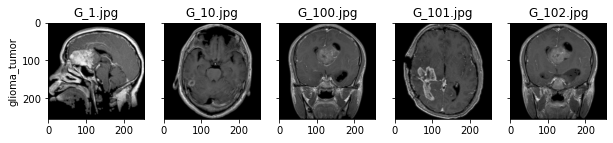

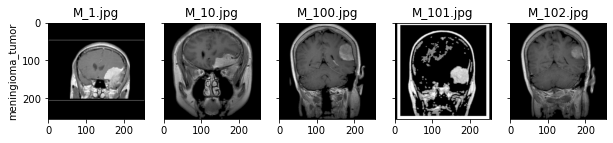

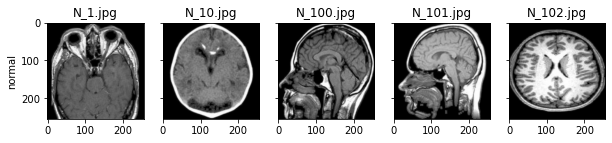

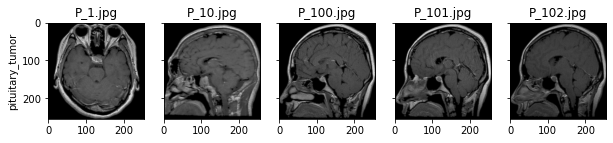

In [10]:
# Lista todos os arquivos e diretórios no caminho especificado
directory = os.listdir(path)

# Para cada chave no dicionário 'disease'
for each in disease.keys():
    # Cria uma nova figura para plotar as imagens, com tamanho 10x10 polegadas
    plt.figure(figsize=(10, 10))
    
    # Define o diretório atual concatenando o caminho base com a chave atual
    currentFolder = path + '/' + each
    
    # Itera sobre os primeiros 5 arquivos no diretório atual
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        # Concatena o caminho completo do arquivo
        fullpath = path + '/' + each + "/" + file
        
        # Lê a imagem usando OpenCV
        img = cv2.imread(fullpath)
        
        # Cria um subplot para a imagem atual
        ax = plt.subplot(1, 5, i + 1)
        
        # Define o título do subplot como o nome do arquivo
        ax.set_title(file)
        
        # Se for o primeiro subplot, define o rótulo do eixo y como o nome da condição
        if i == 0:
            ax.set_ylabel(each)
        else:
            # Remove os rótulos do eixo y para os outros subplots
            ax.set_yticklabels([])
        
        # Exibe a imagem no subplot
        plt.imshow(img)

## Carregamento dos dados

In [11]:
# Inicializa listas vazias para armazenar as imagens (X) e os rótulos (Y)
X = []
Y = []

# Itera sobre cada par de nome e lista de doenças no dicionário 'disease'
for name, diseases in disease.items():
    # Itera sobre cada arquivo de imagem na lista de doenças
    for disease in diseases:
        # Lê a imagem do arquivo usando OpenCV
        img = cv2.imread(str(disease))
        
        # Converte a imagem para o tipo float32 e normaliza os valores dos pixels para o intervalo [0, 1]
        img = img.astype('float32') / 255.0
        
        # Adiciona a imagem processada à lista X
        X.append(img)
        
        # Adiciona o rótulo correspondente à lista Y, usando o dicionário 'labels' para mapear o nome da doença ao rótulo
        Y.append(labels[name])

In [13]:
set(Y)

{0, 1, 2, 3}